# **Portfolio 1 - Deep learning**

    Groepsnummer: 2
    Coach: Vikram 
    Opdrachtnummer: 1
    Namen groepsleden: 
        - Isa Dijkstra, 22119485
        - Natasja de Kok, 22059326
        - Vince Ammerlaan, 21049599
    Kaggle naam:
    
    
## ***Inhoudsopgave*** <a name='begin'></a>

1. [Data inladen](#data)
2. [Opdracht 1 -EDA](#eda)
3. [Opdracht 2 - Fully connected neuraal netwerk](#CNN)
4. [Opdracht 3 - Convolutioneel neuraal netwerk from scratch](#CNNs)
5. [Opdracht 4 - Transfer learning](#tl)
6. [Opdracht 5 - Multimodaal model](#mm)
7. [Opdracht 6 - Bevindingen](#bevindingen)
8. [Opdracht 7 - Conclusie en aanbevelingen](#conclusie)
9. [Bronnenlijst](#bronnenlijst)

In [1]:
import os
import cv2
import random
from pathlib import Path
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.utils import plot_model
from keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

## Data inladen <a name='data'></a>

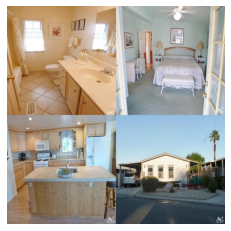

In [2]:
def load_random_image(path):
    files = os.listdir(path)
    image_files = [f for f in files if f.endswith('.png') or f.endswith('.jpg')]
    random_image_file = random.choice(image_files)
    image_path = os.path.join(path, random_image_file)
    image = mpimg.imread(image_path)
    return image

inputPath = 'Train'

image = load_random_image(inputPath)

plt.imshow(image)
plt.axis('off') 
plt.show()

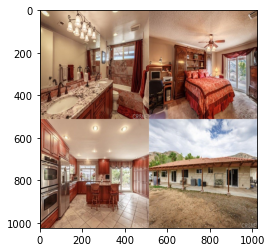

In [3]:
def load_random_image(path):
    files = os.listdir(path)
    image_files = [f for f in files if f.endswith('.png') or f.endswith('.jpg')]
    random_image_file = random.choice(image_files)
    image_path = os.path.join(path, random_image_file)
    image = Image.open(image_path)
    return image

image = load_random_image(inputPath)

plt.imshow(image)
plt.show()

In [4]:
def load_images_and_create_dataframe(directory):
    images = []
    filenames = []

    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
            filepath = os.path.join(directory, filename)
            
            image = Image.open(filepath)
            image_array = np.array(image)
            images.append(image_array)
            filenames.append(filename)

    df = pd.DataFrame({'Filename': filenames, 'Image': images})
    
    df['Filename'] = df['Filename'].str.replace('.jpg', '')
    
    return df

inputPath = 'Train'
image_df = load_images_and_create_dataframe(inputPath)

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_22804\2535199622.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Filename'] = df['Filename'].str.replace('.jpg', '')


In [5]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [6]:
train2 = train.copy()
train2['House ID'] = train2['House ID'].astype(str)

In [7]:
test2 = test.copy()
test2['House ID'] = test2['House ID'].astype(str)

[Terug naar Inhoudsopgave](#begin)

## Opdracht 1 - EDA <a name='eda'></a>

,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude,Price
0,1,4,4.0,4053,33.6968,-111.8892,869500
1,2,4,3.0,3343,34.8280,-119.0349,865200
2,3,3,4.0,3923,33.7669,-111.9182,889000
3,4,5,5.0,4022,33.7752,-111.7791,910000
4,5,3,4.0,4116,33.7669,-111.9182,971226


,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude,Price
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,5.000000e+02
mean,250.500000,3.350000,2.669500,2369.64600,35.128844,-116.469049,5.980218e+05
std,144.481833,1.172283,1.017578,1208.18261,2.386173,6.554434,5.240649e+05
min,1.000000,1.000000,1.000000,701.00000,32.631500,-122.368300,2.200000e+04
25%,125.750000,2.000000,2.000000,1440.00000,33.808200,-119.802500,2.350000e+05
50%,250.500000,3.000000,2.500000,2097.50000,33.920800,-117.609600,5.300000e+05
75%,375.250000,4.000000,3.000000,3104.50000,35.640600,-116.371300,7.490000e+05
max,500.000000,10.000000,7.000000,9583.00000,47.791800,-87.885900,5.858000e+06


House ID     0
Bedrooms     0
Bathrooms    0
Area         0
Latitude     0
Longitude    0
Price        0
dtype: int64

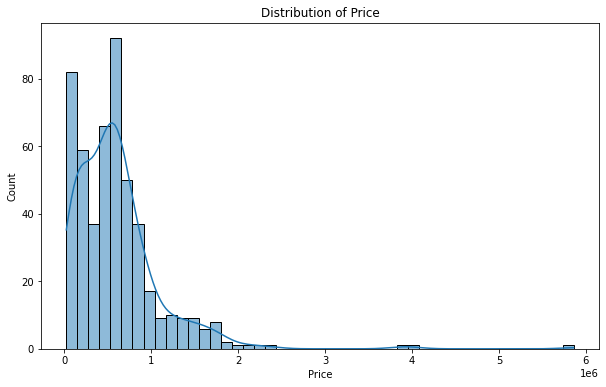

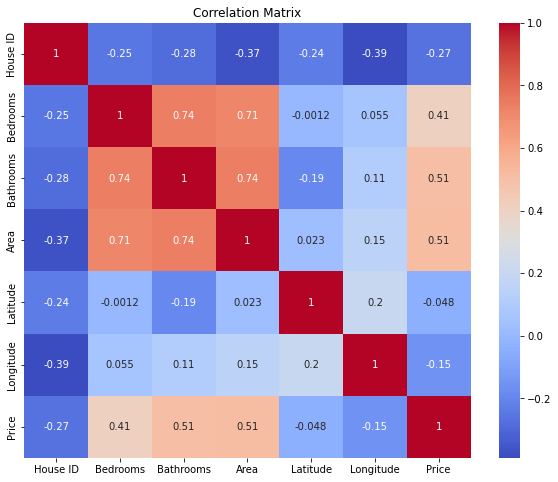

In [8]:
display(train.head())
display(train.describe())

#Missende waardes
display(train.isnull().sum())

# Distribution of the target variable 'Price'
plt.figure(figsize=(10, 6))
sns.histplot(train['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()

# Correlation matrix
corr = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

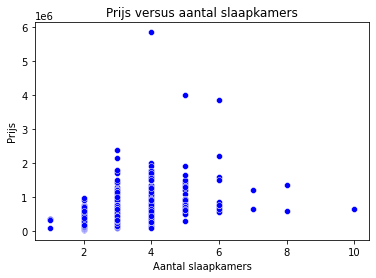

In [9]:
sns.scatterplot(data=train, x='Bedrooms', y='Price', color='blue')
plt.xlabel('Aantal slaapkamers')
plt.ylabel('Prijs')
plt.title('Prijs versus aantal slaapkamers')
plt.show()

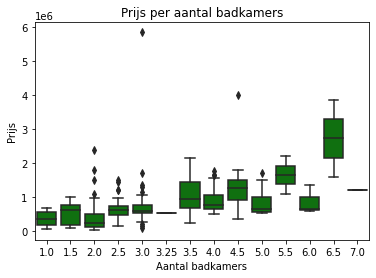

In [10]:
# Boxplot van prijs per aantal badkamers
sns.boxplot(data=train, x='Bathrooms', y='Price', color='green')
plt.xlabel('Aantal badkamers')
plt.ylabel('Prijs')
plt.title('Prijs per aantal badkamers')
plt.show()

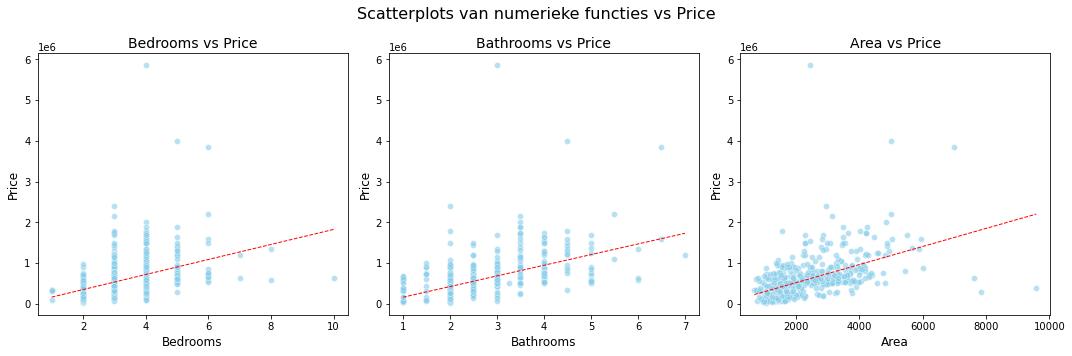

In [11]:
numeric_features = train.select_dtypes(include=['int64', 'float64']).iloc[:, 1:-3]
num_plots = len(numeric_features.columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

plt.figure(figsize=(15, 5*num_rows))

for i, col in enumerate(numeric_features.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.scatterplot(x=col, y='Price', data=train, color='skyblue', alpha=0.6)
    sns.regplot(x=col, y='Price', data=train, scatter=False, color='red', ci=None, line_kws={'linewidth':1, 'linestyle':'--'})
    plt.title(f"{col} vs Price", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Price", fontsize=12)

plt.suptitle("Scatterplots van numerieke functies vs Price", fontsize=16)
plt.tight_layout()
plt.show()

[Terug naar Inhoudsopgave](#begin)

## Opdracht 2 - Fully connected neuraal netwerk <a name='CNN'></a>

### **Neuraal Netwerk**

In [12]:
features = train.drop('Price', axis=1)
target = train['Price'].astype(float)

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)
num_features = features.shape[1]

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(num_features,)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mape')
history = model.fit(features_train, target_train, epochs=40, batch_size=32, validation_data=(features_test, target_test))
predictions = model.predict(features_test)

mape = mean_absolute_percentage_error(target_test, predictions)
print("Mean Absolute Pecrentage Error:", mape)



Epoch 1/40

13/13 [==============================] - 3s 44ms/step - loss: 99.6683 - val_loss: 99.4797
Epoch 2/40
13/13 [==============================] - 0s 11ms/step - loss: 99.3962 - val_loss: 99.1395
Epoch 3/40
13/13 [==============================] - 0s 10ms/step - loss: 99.0481 - val_loss: 98.7123
Epoch 4/40
13/13 [==============================] - 0s 11ms/step - loss: 98.6113 - val_loss: 98.1582
Epoch 5/40
13/13 [==============================] - 0s 11ms/step - loss: 98.0422 - val_loss: 97.4359
Epoch 6/40
13/13 [==============================] - 0s 11ms/step - loss: 97.2893 - val_loss: 96.5136
Epoch 7/40
13/13 [==============================] - 0s 11ms/step - loss: 96.3402 - val_loss: 95.2995
Epoch 8/40
13/13 [==============================] - 0s 11ms/step - loss: 95.0786 - val_loss: 93.7871
Epoch 9/40
13/13 [==============================] - 0s 14ms/step - loss: 93.5439 - val_loss: 91.8636
Epoch 10/40
13/13 [==============================] - 0s 10ms/step - loss: 91.6259 - val_

### **Visualiseren**

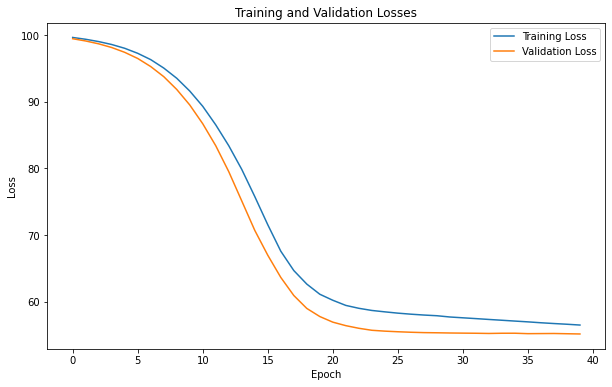

In [13]:
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)

### **Modelarchitectuur**

Werkt niet helaas

In [14]:
#NKOK 14-3
!pip install pydot

In [15]:
#NKOK 14-3
"""
https://chat.openai.com/c/09836b3b-7638-4009-ba60-34f835cc2ee5
https://graphviz.org/download/
https://www.reddit.com/r/ObsidianMD/comments/11vwva6/has_anyone_used_this_graphviz_plugin_is_it_safe/
https://www.minitool.com/backup-tips/windows-protected-your-pc.html -> zet Firewall tijdelijk uit 
op app-controle om het te kunnen installeren.
https://datascience.stackexchange.com/questions/82860/what-is-the-use-of-function-build-in-custom-layers-in-tensorflow-keras
https://stackoverflow.com/questions/63383594/how-does-tensorflow-build-work-from-tf-keras-layers-layer
https://chat.openai.com/c/f6655a14-1621-49a3-9601-1910574ea70b
https://www.computerhope.com/issues/ch000549.htm#windows10
"""
!pip install graphviz
import graphviz

In [16]:
#NKOK 14-3
#later weghalen, maar dit is het pad dat ik heb toegevoegd aan System in windows
#dot = graphviz.Digraph(executable='C:\\Users\\Natasja\\Documents\\arbeid2024\\AI-semester2\\Deep Learning - 2\\Github folder groepsproject DL\\Deep-Learning-Groep-2\\Portfolio opdracht 1\\Graphviz\\bin\\dot.exe')
#


In [17]:
from tensorflow.keras.utils import plot_model

#NKOK 14-3
model.build(input_shape=(None, num_features))
#tot hier 

tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False)

AttributeError: module 'pydot' has no attribute 'InvocationException'

### **Keuze's onderbouwen**
- Aantal lagen en neuronen per laag:
We hebben twee hidden layers, waar ons neurale netwerk leert over de kenmerken van huizen die de prijzen beïnvloeden. Het aantal neuronen in elke laag is zo gekozen dat het netwerk complexe patronen kan begrijpen zonder te ingewikkeld te worden.

- Activeringsfuncties:
We gebruiken een soort 'activatie' genaamd ReLU in onze netwerk. Dit helpt ons netwerk om de gegevens te begrijpen en te leren zonder vast te lopen.

- Optimizer:
De "optimizer" helpt ons netwerk om te leren van de gegevens. We gebruiken een populaire keuze genaamd Adam, die zich aanpast aan de gegevens terwijl het leert.

-  Aantal Epochs
Door te kijken hoe de trainings- en validatieloss veranderen tijdens de trainingsperiode, kunnen we een goed moment vinden om te stoppen met trainen, om overfitting te vermijden. Zoals je in de visualisatie kan zien zie je de trainingsloss snel afnemen en de validatieloss vlak worden na ongeveer 40 epochs, daarom is 40 epochs een goed moment om te stoppen met trainen.

### **Welke lossfunctie**

Voor het voorspellen van huizenprijzen is de Mean Absolute Percentage Error (MAPE) een goede lossfunctie. Deze lossfunctie meet het gemiddelde percentage waarmee de voorspellingen afwijken van de werkelijke waarden. Het is een handige metric voor regressieproblemen zoals huizenprijsvoorspellingen omdat het de nauwkeurigheid van de voorspellingen weergeeft en daarbij ook kijkt naar hoe groot het verschil is ten opzichte van de huizenprijzen.

Adam is een slim algoritme dat helpt bij het trainen van neurale netwerken, zoals ons model om huizenprijzen te voorspellen. Het werkt als volgt:

- Adaptieve leersnelheid: Adam past de leersnelheid (hoe snel het model leert van de gegevens) aan voor elk gewicht in het netwerk. Als sommige kenmerken van de gegevens moeilijker zijn om te leren, zal Adam automatisch de leersnelheid voor die kenmerken verlagen, zodat het model ze beter kan begrijpen.

- Momentum: Het houdt ook rekening met de richting van de vorige updates tijdens het trainen. Als het model eenmaal in een bepaalde richting is gegaan om de lossfunctie te verbeteren, zal Adam die richting onthouden en sneller vooruit gaan in die richting. Dit helpt om sneller te convergeren naar een goed punt waar de voorspellingen nauwkeurig zijn.

In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(num_features,), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mape')
model.fit(features_train, target_train, epochs=40, batch_size=32, validation_data=(features_test, target_test))
predictions = model.predict(features_test)

mape = mean_absolute_percentage_error(target_test, predictions)
print("Mean Absolute Percentage Error:", mape)

Epoch 1/40
13/13 [==============================] - 2s 40ms/step - loss: 100.3859 - val_loss: 100.2633
Epoch 2/40
13/13 [==============================] - 0s 11ms/step - loss: 100.1804 - val_loss: 100.0233
Epoch 3/40
13/13 [==============================] - 0s 12ms/step - loss: 99.9281 - val_loss: 99.7379
Epoch 4/40
13/13 [==============================] - 0s 11ms/step - loss: 99.6256 - val_loss: 99.3519
Epoch 5/40
13/13 [==============================] - 0s 11ms/step - loss: 99.1887 - val_loss: 98.8264
Epoch 6/40
13/13 [==============================] - 0s 11ms/step - loss: 98.6601 - val_loss: 98.1265
Epoch 7/40
13/13 [==============================] - 0s 11ms/step - loss: 97.8743 - val_loss: 97.2256
Epoch 8/40
13/13 [==============================] - 0s 10ms/step - loss: 97.0091 - val_loss: 96.0592
Epoch 9/40
13/13 [==============================] - 0s 11ms/step - loss: 95.7629 - val_loss: 94.5341
Epoch 10/40
13/13 [==============================] - 0s 11ms/step - loss: 94.3057 - val

In [19]:
# Om het naar kaggle te uploaden

y_pred = model.predict(test)
y_pred = np.squeeze(y_pred)

test_predictions_df = pd.DataFrame(
        {'House ID': test['House ID'],
        'Price': y_pred})

#test_predictions_df.to_csv(
#        'Kaggle Submissions/{naam_bestand}.csv',
#       index=False)
    

2/2 [==============================] - 0s 0s/step


[Terug naar Inhoudsopgave](#begin)

## Opdracht 3 - Convolutioneel neuraal netwerk from scratch <a name='CNNs'></a>

### **Onderbouwing keuzes**
Onderbouw je keuzes van het aantal convolutionele lagen, poollagen, convolutionele kernels per laag, het aantal fully-connected lagen en het aantal neuronen per laag.


Een CNN kenmerkt zich door het gebruik van een kernel dat over een afbeelding beweegt, waarbij kenmerken kunnen worden gedetecteerd. In de simpelere lagen worden dingen als lijnen erkend en in de hogere lagen worden steeds abstractere details herkend. Een CNN moet worden afgestemd op hetgeen waarop het wordt toegepast. In het geval van onze portfolio-opdracht wordt de CNN toegepast op gedetailleerde en gevarieerde foto's om de huizenprijzen te kunnen voorspellen. Er is dus nodig dat er meer details worden herkend. Veel lagen en neuronen kunnen daarbij te pas komen, al moet een balans worden behouden ten op zichte van het aantal foto's. Als er bijvoorbeeld maar 3 foto's zouden zijn en je een model zou maken met 3 lagen die elk 3 neuronen bevatten, dan zou het kunnen dat de kans op overfitten erg groot wordt.
Als je tegelijkertijd een model wil creëeren waarbij je de kans op overfitten verlaagt, kun je kiezen voor meer pooling-lagen. Deze pooling-lagen maken de afbeeldingen minder complex, waarbij dus meer algemeenheden kunnen worden opgemerkt. Je versimpelt hiermee de input van het model en maakt het waarschijnlijk ook iets sneller dan wanneer de input uit nog steeds hele complexe plaatjes bestaat. 
We hebben per convolutional layer voor steeds meer  filters gekozen, zodat complexere details kunnen worden ontwaard.

3.	Gebruik een of meer van de volgende technieken in je model. Beschrijf en motiveer je keuze:

- L1 regularisatie
- L2 regularisatie
- Dropout
- Batchnorm

Doordat we een flink aantal lagen en neuronen gebruiken kan het trainen van het model wat vertraagd zijn. We gebruiken Batchnorm om weer wat snelheid in de training van het model te krijgen (https://en.wikipedia.org/wiki/Batch_normalization). Dropout is een techniek om overfitting te voorkomen. Door hier gebruik van te maken worden er willekeurig neuronen uitgezet. We gebruiken het ook weer dankzij ons flinke aantal lagen en neuronen. Ook L2 regularisatie kan overfitten voorkomen. Daarbij worden fouten kwadratisch vergroot, waardoor het gewicht extra wordt verkleind als een neuron een fout maakt.

4.	Beschrijf welke vormen van data augmentation (indien van toepassing ) geschikt zijn voor dit probleem. Implementeer dit in je datapijplijn.
Data augmentation betekent het veranderen van de data met als doel de data diverser te maken en / of de hoeveelheid data te vergroten. Daarbij kun je denken aan de kleuren veranderen, de afbeelding spiegelen, vergroten, verkleinen, schuin maken en verschuiven. Omdat er naar kenmerken op foto's wordt gekeken en alle foto's redelijk recht lijken te zijn, lijken horizontaal spiegelen mij nuttig, evenals het feller maken of anderzijds veranderen van de helderheid van de foto's nuttig, omdat de lichtinval nogal kan verschillen per foto. 


Nog augmentation te doen hier

5.	Compile je model met je gekozen lossfunctie en optimizer, en train deze op de afbeeldingen.
Ik kies voor Adam (https://www.analyticsvidhya.com/blog/2023/09/what-is-adam-optimizer/) als optimizer. De loss fuction die ik kies is de MSE, omdat die wordt aangeraden (https://builtin.com/machine-learning/common-loss-functions) bij CNNs. Ik kies voor relu als activation function, omdat die non-lineariteit introduceert. Dat zorgt ervoor dat een complexer model kan worden getraind.


In [20]:
#NKOK nog niet af CNN met 3 lagen
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, img_channels)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1)) 

NameError: name 'img_height' is not defined

 ### **Bronnen**
https://www.analyticsvidhya.com/blog/2022/03/visualize-deep-learning-models-using-visualkeras/

[Terug naar Inhoudsopgave](#begin)

## Opdracht 4 - Transfer learning <a name='tl'></a>

In [22]:
# Load images without considering the directory-generated labels
image_size = (224, 224)
batch_size = 32

# This loads the images but ignores the labels
image_dataset = tf.keras.utils.image_dataset_from_directory(
    'Train',
    label_mode=None,
    image_size=image_size,
    batch_size=batch_size
)

# Extract file paths from the dataset
image_file_paths = image_dataset.file_paths

# Extract only file ID without extension from file paths
image_uuids = [Path(image_file_path).stem for image_file_path in image_file_paths]

# Map each file path to its label using the DataFrame
# Ensure the uuids in the DataFrame exactly match those in `image_uuids`
labels = [train2.loc[train2['House ID'] == uuid, 'Price'].values[0] / 100000 for uuid in image_uuids]

# Convert the list of labels into a TensorFlow dataset
labels_dataset = tf.data.Dataset.from_tensor_slices(labels).batch(batch_size)

# Combine the original image dataset with the labels dataset
final_dataset = tf.data.Dataset.zip((image_dataset, labels_dataset))

Found 500 files belonging to 1 classes.


In [23]:
#test data inladen
test_image_dataset = tf.keras.utils.image_dataset_from_directory(
    'Test',
    label_mode=None,
    image_size=image_size,
    batch_size=batch_size
)

Found 35 files belonging to 1 classes.


In [24]:
num_batches_train = len(list(final_dataset))
print("Number of batches in final_train_dataset:", num_batches_train)


Number of batches in final_train_dataset: 16


In [25]:
train_dataset = final_dataset.take(12) 
val_dataset = final_dataset.skip(12) 

In [26]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(5).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [27]:
batch_size = 32
img_height = 224
img_width = 224

In [28]:
#del(model_xfer)

resnet50_model = tf.keras.applications.resnet50.ResNet50(input_shape=(img_height, img_width, 3),
                                               include_top=False,
                                               weights='imagenet')

# Freeze the model
resnet50_model.trainable = False

# Get the preprocessing function for the ResNet50 model
preprocess_input = tf.keras.applications.resnet50.preprocess_input

# Convert this function into a Keras layer using tf.keras.layers.Lambda()
preprocessing_layer = layers.Lambda(preprocess_input)

# Build and train the model.
# Make sure to use a Flatten() or a GlobalAveragePooling2D() layer after the feature extraction layers to give a 1D input for the dense layers

model_xfer = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),

    # Adding the preprocessing layer
    preprocessing_layer,

    # Adding the pretrained model
    resnet50_model,

    # Flatten output
    layers.GlobalAveragePooling2D(),

    # Adding dropout
    layers.Dropout(0.25),

    # Output layer
    layers.Dense(1)
])


# Compile the model

base_learning_rate = 0.005
model_xfer.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss='mape')

# Fit the model

initial_epochs = 20

# Add early stopping to the tuning process
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

history = model_xfer.fit(train_dataset, validation_data=val_dataset, epochs=initial_epochs, callbacks=[stop_early])


Epoch 1/20
12/12 [==============================] - 54s 4s/step - loss: 86.1016 - val_loss: 68.0820
Epoch 2/20
12/12 [==============================] - 38s 3s/step - loss: 73.2562 - val_loss: 68.5172
Epoch 3/20
12/12 [==============================] - 39s 3s/step - loss: 74.0511 - val_loss: 71.5043
Epoch 4/20
12/12 [==============================] - 39s 3s/step - loss: 71.9978 - val_loss: 69.0498
Epoch 5/20
12/12 [==============================] - 39s 3s/step - loss: 72.8569 - val_loss: 68.2002
Epoch 6/20
12/12 [==============================] - 39s 3s/step - loss: 70.9377 - val_loss: 68.9364
Epoch 7/20
12/12 [==============================] - 39s 3s/step - loss: 70.6753 - val_loss: 69.4281
Epoch 8/20
12/12 [==============================] - 39s 3s/step - loss: 71.0855 - val_loss: 74.6381
Epoch 9/20
12/12 [==============================] - 39s 3s/step - loss: 78.7971 - val_loss: 70.8946
Epoch 10/20
12/12 [==============================] - 39s 3s/step - loss: 72.6940 - val_loss: 68.043

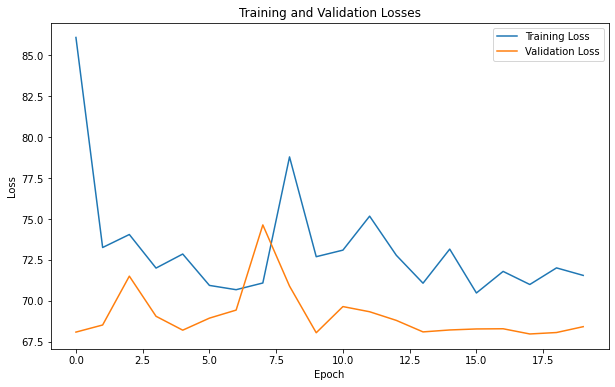

In [29]:
plot_loss(history)

In [30]:
resnet50_model = tf.keras.applications.resnet50.ResNet50(input_shape=(img_height, img_width, 3),
                                               include_top=False,
                                               weights='imagenet')

# Freeze the model
resnet50_model.trainable = False

# Get the preprocessing function for the ResNet50 model
preprocess_input = tf.keras.applications.resnet50.preprocess_input

# Convert this function into a Keras layer using tf.keras.layers.Lambda()
preprocessing_layer = layers.Lambda(preprocess_input)

# Build and train the model.
# Make sure to use a Flatten() or a GlobalAveragePooling2D() layer after the feature extraction layers to give a 1D input for the dense layers

model_fer = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),

    # Adding the preprocessing layer
    preprocessing_layer,

    # Adding the pretrained model
    resnet50_model,

    # Flatten output
    layers.GlobalAveragePooling2D(),

    # Adding dropout
    layers.Dropout(0.25),

    # Output layer
    layers.Dense(1)
])


# Compile the model

base_learning_rate = 0.0005
model_fer.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss='mape')

# Fit the model

initial_epochs = 20

# Add early stopping to the tuning process
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

history = model_fer.fit(train_dataset, validation_data=val_dataset, epochs=initial_epochs, callbacks=[stop_early])

Epoch 1/20
12/12 [==============================] - 49s 3s/step - loss: 113.9719 - val_loss: 92.0145
Epoch 2/20
12/12 [==============================] - 38s 3s/step - loss: 82.9089 - val_loss: 68.1220
Epoch 3/20
12/12 [==============================] - 38s 3s/step - loss: 71.2119 - val_loss: 69.2805
Epoch 4/20
12/12 [==============================] - 38s 3s/step - loss: 71.8867 - val_loss: 69.3848
Epoch 5/20
12/12 [==============================] - 38s 3s/step - loss: 70.8131 - val_loss: 69.0587
Epoch 6/20
12/12 [==============================] - 38s 3s/step - loss: 73.5833 - val_loss: 68.4857
Epoch 7/20
12/12 [==============================] - 38s 3s/step - loss: 71.6404 - val_loss: 68.2092
Epoch 8/20
12/12 [==============================] - 38s 3s/step - loss: 71.7097 - val_loss: 68.1795
Epoch 9/20
12/12 [==============================] - 38s 3s/step - loss: 73.1041 - val_loss: 68.1282
Epoch 10/20
12/12 [==============================] - 38s 3s/step - loss: 72.9982 - val_loss: 68.297

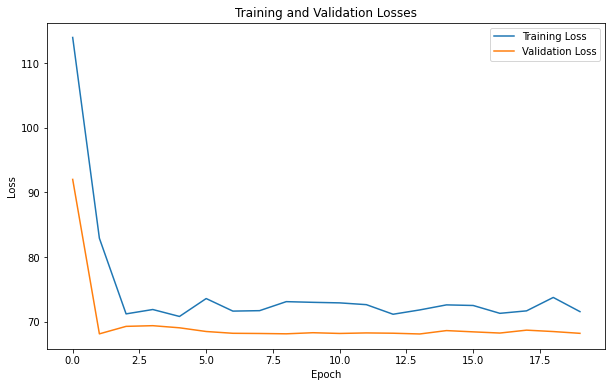

In [31]:
plot_loss(history)

In [34]:
model1 = Sequential()
model1.add(preprocessing_layer)
model1.add(resnet50_model)
model1.add(GlobalAveragePooling2D())
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
#model.add(BatchNormalization())
model1.add(Dropout(0.25))
model1.add(Dense(128, activation='relu'))
#model.add(BatchNormalization())
model1.add(Dropout(0.25))
model1.add(Dense(64, activation='relu'))
#model.add(BatchNormalization())
model1.add(Dropout(0.25))
model1.add(Dense(32, activation='relu', kernel_regularizer='l1_l2'))
#model.add(BatchNormalization())
model1.add(Dropout(0.25))
model1.add(Dense(1))
          
          
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mape')

# Fit the model

initial_epochs = 15

# Add early stopping to the tuning process
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model1.fit(train_dataset, validation_data=val_dataset, epochs=initial_epochs, callbacks=[stop_early])          
          


Epoch 1/15
12/12 [==============================] - 56s 4s/step - loss: 97.8283 - val_loss: 76.0937
Epoch 2/15
12/12 [==============================] - 37s 3s/step - loss: 83.2267 - val_loss: 71.5494
Epoch 3/15
12/12 [==============================] - 37s 3s/step - loss: 84.4910 - val_loss: 71.3854
Epoch 4/15
12/12 [==============================] - 37s 3s/step - loss: 82.6997 - val_loss: 74.5463
Epoch 5/15
12/12 [==============================] - 38s 3s/step - loss: 84.0848 - val_loss: 73.6123
Epoch 6/15
12/12 [==============================] - 37s 3s/step - loss: 80.4079 - val_loss: 71.1108
Epoch 7/15
12/12 [==============================] - 37s 3s/step - loss: 76.3775 - val_loss: 76.4172
Epoch 8/15
12/12 [==============================] - 37s 3s/step - loss: 76.4588 - val_loss: 73.9379
Epoch 9/15
12/12 [==============================] - 38s 3s/step - loss: 76.1469 - val_loss: 71.9568
Epoch 10/15
12/12 [==============================] - 37s 3s/step - loss: 76.8925 - val_loss: 71.1974

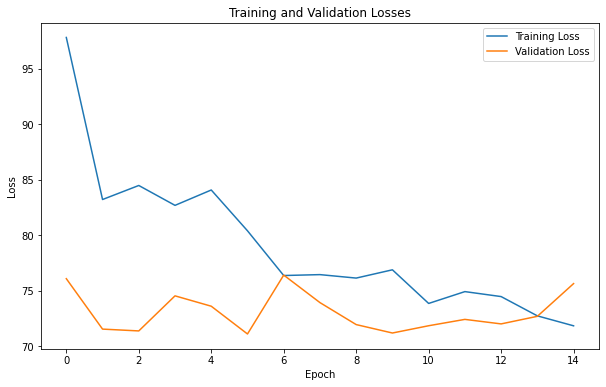

In [35]:
plot_loss(history)

In [36]:
y_pred = model_xfer.predict(test_image_dataset)
y_pred= y_pred*100000
y_pred = np.squeeze(y_pred)

test_predictions_df = pd.DataFrame(
        {'House ID': test['House ID'],
        'Price': y_pred})

#test_predictions_df.to_csv(
#        f'Kaggle Submissions/{naam_bestand}.csv',
#        index=False)

2/2 [==============================] - 7s 378ms/step


<b> Voordelen van het gebruik van vooraf getrainde visionmodellen </b>
    
Vooral getrainde visionmodellen hebben verschillende voordelen, zoals bijvoorbeeld:
- Je hebt minder gegevens nodig
- Het gebruikt minder rekenkracht
- Het is nauwkeuriger dan een op maat gebouwd CNN model.


https://appmaster.io/nl/glossary/computervisie

https://towardsdatascience.com/the-applications-and-benefits-of-a-pretrained-model-kaggles-dogsvscats-50221902c696




[Terug naar Inhoudsopgave](#begin)

## Opdracht 5 - Multimodaal model <a name='mm'></a>

In [37]:
# Load images without considering the directory-generated labels
image_size = (224, 224)
batch_size = 32

# This loads the images but ignores the labels
image_dataset = tf.keras.utils.image_dataset_from_directory(
    'Train',
    label_mode=None,
    image_size=image_size,
    batch_size=batch_size
)

# Extract file paths from the dataset
image_file_paths = image_dataset.file_paths

# Extract only file ID without extension from file paths
image_uuids = [Path(image_file_path).stem for image_file_path in image_file_paths]

# Map each file path to its tabular features using the DataFrame
# Ensure the uuids in the DataFrame exactly match those in `image_uuids`
tabular_features = [train2.loc[train2['House ID'] == uuid, ['Bedrooms', 'Bathrooms', 'Area', 'Latitude', 'Longitude']].values[0] for uuid in image_uuids]

# Convert the list of tabular features into a TensorFlow dataset
tabular_features_dataset = tf.data.Dataset.from_tensor_slices(tabular_features).batch(batch_size)

# Map each file path to its label using the DataFrame
# Ensure the uuids in the DataFrame exactly match those in `image_uuids`
labels = [train2.loc[train2['House ID'] == uuid, 'Price'].values[0] / 100000 for uuid in image_uuids]

# Convert the list of labels into a TensorFlow dataset
labels_dataset = tf.data.Dataset.from_tensor_slices(labels).batch(batch_size)

# Combine the original image dataset with the labels dataset
final_dataset = tf.data.Dataset.zip((image_dataset, tabular_features_dataset), labels_dataset)


Found 500 files belonging to 1 classes.


In [38]:
#test data inladen

test_image_dataset = tf.keras.utils.image_dataset_from_directory(
    'Test',
    label_mode=None,
    image_size=image_size,
    batch_size=batch_size
)

# Extract file paths from the dataset
test_image_file_paths = test_image_dataset.file_paths

# Extract only file ID without extension from file paths
test_image_uuids = [Path(image_file_path).stem for image_file_path in test_image_file_paths]



test_tabular_features = [test2.loc[test2['House ID'] == uuid, ['Bedrooms', 'Bathrooms', 'Area', 'Latitude', 'Longitude']].values[0] for uuid in test_image_uuids]


tabular_features_array = np.array(test_tabular_features)

test_images_array = np.concatenate([image.numpy() for image in test_image_dataset])


Found 35 files belonging to 1 classes.


In [39]:
num_batches_train = len(list(final_dataset))
print("Number of batches in final_train_dataset:", num_batches_train)


Number of batches in final_train_dataset: 16


In [40]:
# Split dataset into training and validation

train_dataset_5 = final_dataset.take(12) 
val_dataset_5 = final_dataset.skip(12) 

In [41]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset_5 = train_dataset_5.cache().shuffle(5).prefetch(buffer_size=AUTOTUNE)
val_dataset_5 = val_dataset_5.cache().prefetch(buffer_size=AUTOTUNE)

In [42]:
from sklearn.utils import class_weight
import numpy as np

y_train = np.concatenate([y for x, y in train_dataset_5], axis=0)
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights_dict = dict(enumerate(class_weights))

In [52]:
#del(model)

#kaggle score 0.56325 // vs_opdracht_5_4.csv

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, concatenate
from tensorflow.keras.optimizers import Adam

# Branch 1: Image Input
img_input = Input(shape=(224, 224, 3), name='img_input')
x1 = Conv2D(32, (3, 3), activation='relu')(img_input)
x1 = MaxPooling2D((2, 2))(x1)
x1 = Conv2D(64, (3, 3), activation='relu')(x1)
x1 = MaxPooling2D((2, 2))(x1)
x1 = Conv2D(128, (3, 3), activation='relu')(x1)
x1 = MaxPooling2D((2, 2))(x1)
x1 = Dropout(0.25)(x1)
x1 = Flatten()(x1)

# Branch 2: Tabular Data Input
tab_input = Input(shape=(5,), name='tab_input')
x2 = Dense(64, activation='relu')(tab_input)
x2 = Dense(128, activation='relu')(x2)


# Concatenate the two branches
concatenated = concatenate([x1, x2])

# Additional Dense layers after concatenation
x = Dense(256, activation='relu')(concatenated)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)

# Output layer
output = Dense(1)(x)

# Create the model
model = Model(inputs=[img_input, tab_input], outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.005), loss='mape')

# Model summary to check the architecture
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img_input (InputLayer)      [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_9 (Conv2D)           (None, 222, 222, 32)         896       ['img_input[0][0]']           
                                                                                                  
 max_pooling2d_9 (MaxPoolin  (None, 111, 111, 32)         0         ['conv2d_9[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_10 (Conv2D)          (None, 109, 109, 64)         18496     ['max_pooling2d_9[0][0]'

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=15)

num_epochs = 20

history = model.fit(train_dataset_5, validation_data=val_dataset_5, class_weight=class_weights_dict, epochs=num_epochs, callbacks=[early_stopping])

Epoch 1/20
12/12 [==============================] - 12s 1s/step - loss: 64.6629 - val_loss: 48.3779
Epoch 2/20
12/12 [==============================] - 12s 1s/step - loss: 60.7281 - val_loss: 51.2044
Epoch 3/20
12/12 [==============================] - 12s 996ms/step - loss: 60.6840 - val_loss: 49.1808
Epoch 4/20
12/12 [==============================] - 12s 997ms/step - loss: 62.6460 - val_loss: 47.5951
Epoch 5/20
12/12 [==============================] - 12s 1s/step - loss: 60.1574 - val_loss: 50.4673
Epoch 6/20
12/12 [==============================] - 12s 1s/step - loss: 59.3377 - val_loss: 47.7575
Epoch 7/20
12/12 [==============================] - 12s 1s/step - loss: 58.7190 - val_loss: 49.6733
Epoch 8/20
12/12 [==============================] - 12s 999ms/step - loss: 61.2225 - val_loss: 50.3307
Epoch 9/20
12/12 [==============================] - 12s 1s/step - loss: 63.0454 - val_loss: 51.7280
Epoch 10/20
12/12 [==============================] - 12s 1s/step - loss: 60.2563 - val_loss

In [54]:
y_pred = model.predict([test_images_array, tabular_features_array])
y_pred= y_pred*100000
y_pred = np.squeeze(y_pred)
    


test_predictions_df = pd.DataFrame(
        {'House ID': test['House ID'],
        'Price': y_pred})
    

#test_predictions_df.to_csv(
#        f'Kaggle Submissions/vs_opdracht_5_6.csv',
#        index=False)
    

2/2 [==============================] - 1s 53ms/step


[Terug naar Inhoudsopgave](#begin)

## Opdracht 6 - Bevindingen <a name='bevindingen'></a>

[Terug naar Inhoudsopgave](#begin)


## Opdracht 7 - Conclusie en aanbevelingen <a name='conclusie'></a>

[Terug naar Inhoudsopgave](#begin)

## Bronnenlijst <a name='bronnenlijst'></a>

[Terug naar Inhoudsopgave](#begin)